<a href="https://colab.research.google.com/github/1-Sushma/oasis/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import os
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
email_df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='latin-1')
email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
column_to_delete = [name for name in email_df.columns if name.startswith('Unnamed')]
email_df.drop(columns = column_to_delete, inplace = True)

In [ ]:
email_df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

In [ ]:
email_df.tail()

,target,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
email_df.isnull().sum()

target     0
message    0
dtype: int64

In [ ]:
print("Total duplicated records in dataset are : {}".format(email_df.duplicated().sum()))

Total duplicated records in dataset are : 403


In [ ]:
def target_mapper(text):
    return 0 if text=='spam' else 1
email_df["target"]=email_df['target'].apply(func=target_mapper)

In [ ]:
import nltk
nltk.download('punkt') #download punctuation
nltk.download('stopwords') #download stopwords
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import tokenize  #import nltk tokenize package to use word and sentence tokenizer.
STOPWORDS=stopwords.words("english") #taking only english stopwords because spam messages are in english language only.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def message_tranformation(text):
    text=text.strip() #remove black spaces from starting and ending of message text
    text=text.lower() #coverting all message words into lowercase format to generalize it.
    #tokenize the text
    words=tokenize.word_tokenize(text)
    #intialize the porter stemmer
    stemmer=PorterStemmer()
    #remove stopwords and applying stemming while ignoring special words.
    filtered_words=[stemmer.stem(word) for word in words if word not in STOPWORDS and word.isalnum()]
    #Join list of filter words back to the string format
    transformed_text=" ".join(filtered_words)
    return transformed_text

In [ ]:
email_df["transformed_message"]=email_df["message"].apply(message_tranformation)

In [ ]:
email_df.head()

,target,message,transformed_message
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
email_df.drop(columns="message",inplace = True)


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=8,background_color='white')

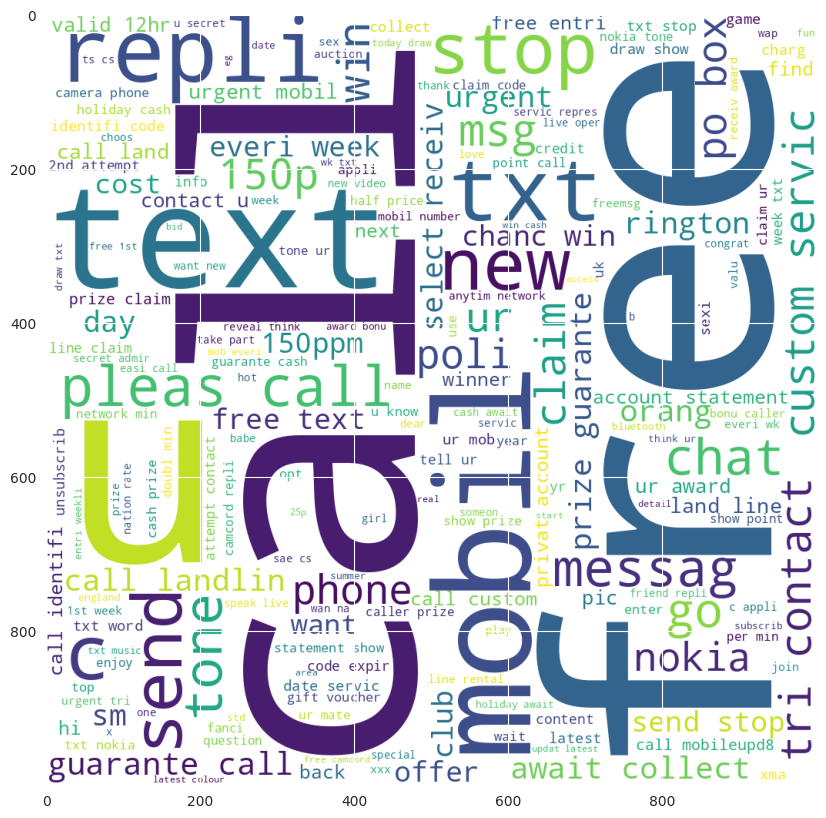

In [ ]:
spam_wc=wc.generate(email_df[email_df["target"]==0]["transformed_message"].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()



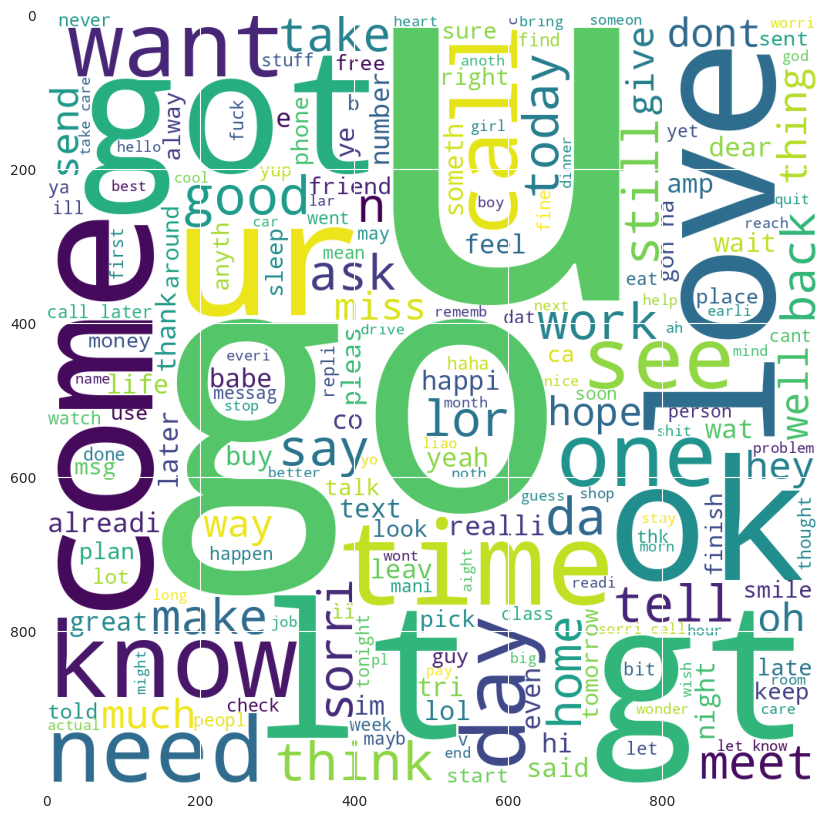

In [ ]:
ham_wc=wc.generate(email_df[email_df["target"]==1]["transformed_message"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam_corpus = list()
for msg in email_df[email_df['target']==0]["transformed_message"].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11490

In [ ]:
from collections import Counter
spam_top_50_common_words=pd.DataFrame(Counter(spam_corpus).most_common(50))
print(spam_top_50_common_words)

           0    1
0       call  365
1       free  219
2          2  174
3        txt  169
4         ur  144
5          u  141
6       text  139
7      mobil  135
8          4  120
9      claim  115
10      stop  114
11     repli  112
12     prize   94
13       get   88
14      tone   74
15    servic   72
16      send   70
17       new   69
18     nokia   68
19     award   66
20      week   62
21      cash   62
22    urgent   62
23       win   61
24   contact   61
25     pleas   57
26     phone   57
27         c   51
28    custom   51
29   collect   51
30       min   51
31  guarante   50
32       per   46
33    messag   45
34      chat   45
35        cs   41
36      draw   40
37     offer   40
38       tri   39
39    number   39
40     today   38
41    receiv   37
42    latest   37
43      line   37
44       msg   36
45   voucher   36
46      show   35
47         1   34
48   rington   34
49    150ppm   34


In [ ]:
ham_corpus = list()
for msg in email_df[email_df['target']==1]["transformed_message"].to_list():
  for word in msg.split():
    ham_corpus.append(word)


In [ ]:
len(ham_corpus)

38221

In [ ]:
ham_top_50_words = pd.DataFrame(Counter(ham_corpus).most_common(50))
print(ham_top_50_words)

        0    1
0       u  979
1      go  417
2     get  357
3      gt  318
4      lt  316
5       2  300
6    come  295
7    call  291
8    know  248
9      ok  245
10   like  244
11    got  242
12   love  241
13     ur  237
14   good  230
15   time  228
16   want  212
17    day  212
18   need  174
19    one  174
20      4  163
21    lor  162
22   home  161
23  sorri  156
24    see  153
25  think  151
26     da  150
27   take  149
28  still  148
29      n  139
30    say  138
31   tell  138
32  today  135
33  later  135
34   send  135
35   make  134
36   work  132
37      r  131
38   back  130
39   dont  127
40    ask  126
41   hope  125
42   meet  119
43  happi  118
44   miss  117
45     pl  116
46     hi  116
47  night  113
48    wat  112
49   well  112


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cVector = CountVectorizer() #CountVectorizer is used to convert text into numeric array
x = cVector.fit_transform(email_df["transformed_message"]).toarray()


In [ ]:
#separating target column
y = email_df['target']

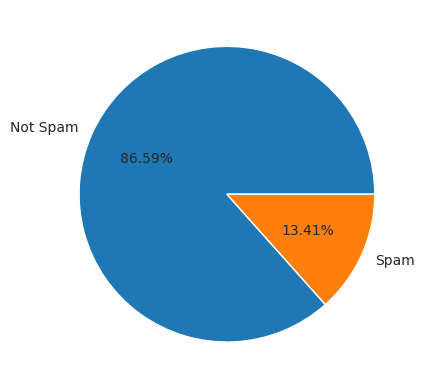

In [ ]:
plt.pie(y.value_counts().values,labels=["Not Spam","Spam"],autopct="%0.2f%%")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4457, 6708), (4457,), (1115, 6708), (1115,))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
#function to evaluate the performance of model
def evaluate_model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("Accurary Score : {}".format(np.round(accuracy_score(y_test,y_pred)*100,decimals=2)))
    print("Precision Score : {}".format(np.round(precision_score(y_test,y_pred)*100,decimals=2)))
    print("Recall Score : {}".format(np.round(recall_score(y_test,y_pred)*100,decimals=2)))
    print("F1 Score : {}".format(np.round(f1_score(y_test,y_pred)*100,decimals=2)))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt="d",annot=True,cmap="rainbow")
    plt.show()
    print("*Classification Report*********************************************")
    print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


lr  :  94.4
nb  :  97.2
svm  :  89.8
knn  :  85.8
cart  :  92.8
rf  :  92.2
ad  :  94.4
gb  :  94.0
xgbc  :  93.4


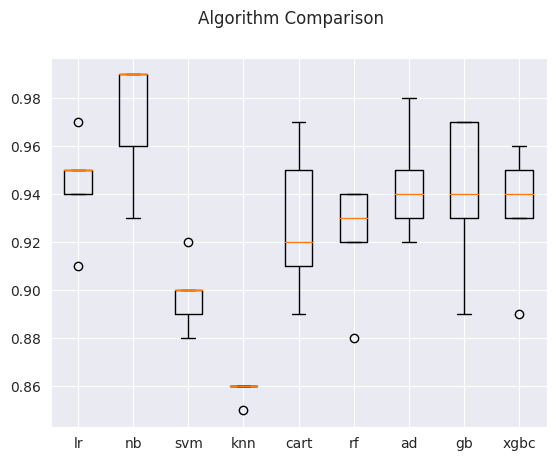

In [ ]:

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
# Define models
models = {
    "lr":LogisticRegression(),
    "nb":MultinomialNB(),
    "svm":SVC(),
    "knn":KNeighborsClassifier(),
    "cart":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "ad":AdaBoostClassifier(),
    "gb":GradientBoostingClassifier(),
    "xgbc":XGBClassifier()
}
# Define oversampler for dealing with imbalance
oversampler = RandomOverSampler()
# Define cross-validation strategy for imbalanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_scores=list()
# Loop through each model and evaluate its performance
for model_name, model in models.items():
    # Apply oversampling to training data
    X_resampled, y_resampled = oversampler.fit_resample(x, y)
    # Perform cross-validation
    scores = cross_val_score(model, X_resampled[:500], y_resampled[:500], cv=cv, scoring="f1_micro")
    print(model_name," : ",np.round(np.mean(scores)*100,decimals=2))
    model_scores.append(scores)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_scores)
ax.set_xticklabels(models.keys())
plt.show()

In [ ]:
model=MultinomialNB()
model.fit(x_train,y_train)
print("Model Training score : ",model.score(x_train,y_train))

Model Training score :  0.9916984518734575


Accurary Score : 97.94
Precision Score : 99.16
Recall Score : 98.44
F1 Score : 98.8


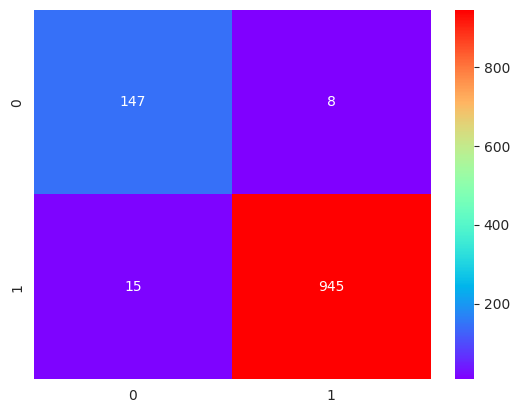

*Classification Report*********************************************
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       155
           1       0.99      0.98      0.99       960

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
evaluate_model_performance(model,x_test,y_test)